駅中グラフの描画用

In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import networkx as nx
from datetime import datetime
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

駅のグラフとプロットの表示(確定版)

In [2]:
# df_link = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/stanw_link_post.csv') 
df_link = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/stanw_link_post_all.csv')
df_link = df_link.iloc[:-5, :] # 吸収リンクは表示しない
df_ble = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_nw_detail/ble_nw.csv')
## 工事後はBLE減っているので
filtered_ble = df_ble[~df_ble['ID'].between(8, 11) & ~df_ble['ID'].between(12, 14)]
# df_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/stanw_node.csv') 
df_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/stanw_node_all.csv')
df_node = df_node.iloc[:-5, :] # 吸収ノードは表示しない

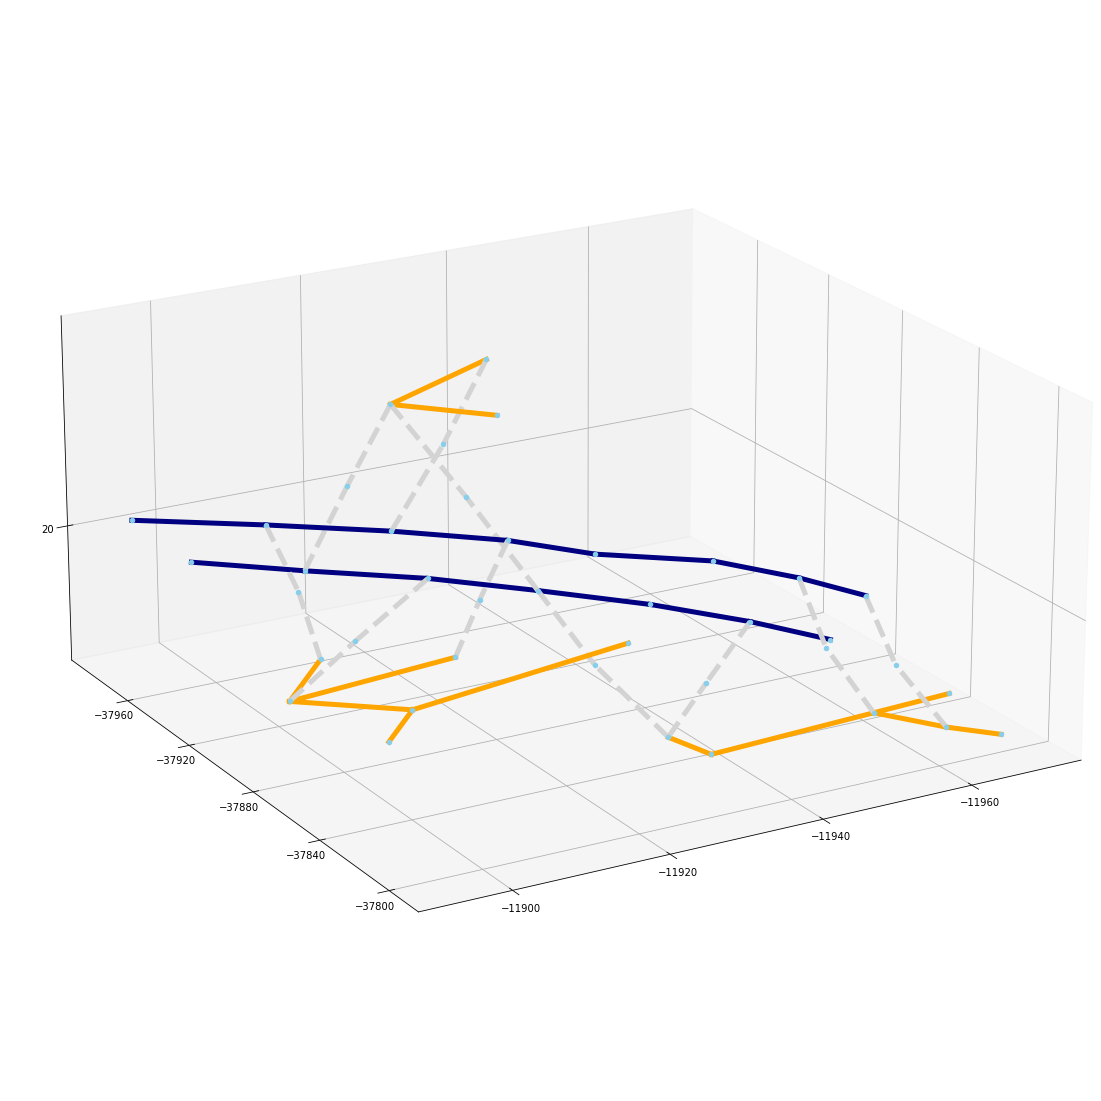

In [3]:
# グラフの作成
G = nx.Graph()

# 階ごとの配色の設定
color_mapping = {
    14.8: 'orange',
    20.5: 'navy',
    28.5: 'orange' #'yellowgreen'
}

# ノードの追加
for idx, row in df_node.iterrows():
    G.add_node(row['nodeid'], pos=(row['x'], row['y'], row['floor']))

# リンクの追加
for idx, row in df_link.iterrows():
    floor_source = G.nodes[row['o']]['pos'][2]  # リンクの始点の'floor'値
    floor_target = G.nodes[row['d']]['pos'][2]  # リンクの終点の'floor'値
    G.add_edge(row['o'], row['d'], linkid=row['linkid']) #, color = link_color) #, linewidth = link_width, linestyle = link_style)

isolated_nodes = [node for node in G.nodes() if G.degree[node] == 0]

# グラフからリンクを持たないノードを削除
G.remove_nodes_from(isolated_nodes)

# 座標の取得
pos = nx.get_node_attributes(G, 'pos')

# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# グリッドの設定
ax.grid(True)

# 各軸のメモリの間隔を10に設定
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_locator(MultipleLocator(40))
ax.zaxis.set_major_locator(MultipleLocator(10))

point_size = 150
#ax.scatter(df_csv['x'], df_csv['y'], df_csv['z'], c='green', s = point_size, label='Point Cloud Data from CSV')

#point_size = 700
#ax.scatter(filtered_ble['x'], filtered_ble['y'], filtered_ble['floor'], c='red', s = point_size, label='Point Cloud Data from BLE')

ax.view_init(elev=20, azim=60)  # elevは上下方向の角度、azimは左右方向の角度
ax.set_box_aspect([1, 1, 0.5])  # [横方向, 前後方向, 上下方向]の比率を設定

for node, coords in pos.items():
    ax.scatter(*coords, color='skyblue')
    #ax.text(*coords, s=f"Node {node}", color='black')

for edge in G.edges(data=True):
    node1, node2, edge_attr = edge
    x = [pos[node1][0], pos[node2][0]]
    y = [pos[node1][1], pos[node2][1]]
    z = [pos[node1][2], pos[node2][2]]

    floor_source = G.nodes[node1]['pos'][2]  # リンクの始点の'floor'値
    floor_target = G.nodes[node2]['pos'][2]  # リンクの終点の'floor'値
    #print(f'floor_sourceは{floor_source}, floor_targetは{floor_target}')

    # 'floor'値に基づいて色を割り当てる
    if floor_source in color_mapping and floor_target in color_mapping:
        link_color = color_mapping[floor_source]  # 始点と終点の両方がマッピング内にある場合        
        link_width = 5.0   
        link_style = '-'   
    else: 
        link_width = 5.0
        link_color = 'lightgray'
        link_style = '--'   

    ax.plot(x, y, z, color=link_color, linewidth = link_width, linestyle = link_style)

plt.show()

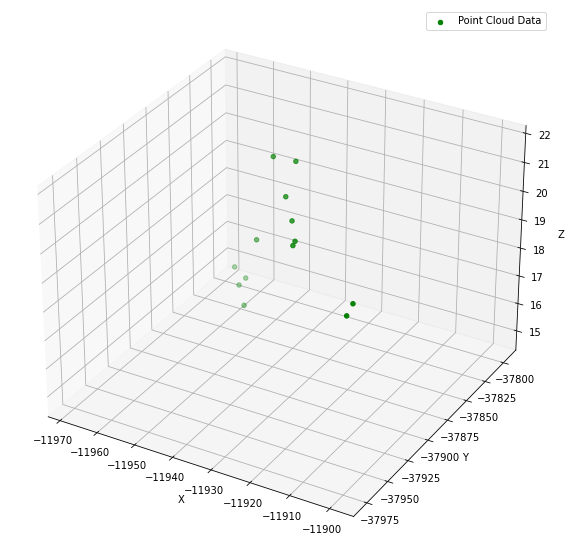

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSVファイルをPandasのデータフレームとして読み込む
df = pd.read_csv('/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/20230130_08/20230130_08_18sec_end162021_over11step_alllocation/0.csv')

# 3次元のグラフの作成
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# データフレームからx, y, zの座標を抽出し、3次元グラフにプロット
ax.scatter(df['x'], df['y'], df['z'], c='green', label='Point Cloud Data')

# グラフのラベル設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# プロットの表示
plt.legend()
plt.show()

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# サンプルデータフレーム df_link, df_node（実際のデータに置き換えてください）
#data_link = {
#    'linkid': [1, 2, 3],
#    'o': [1, 2, 3],
#    'd': [2, 3, 1]
#}

df_link = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/stanw_link_post.csv') #pd.DataFrame(data_link)

#data_node = {
#    'nodeid': [1, 2, 3],
#    'x': [0.0, 1.0, 0.5],
#    'y': [0.0, 1.5, 2.0],
#    'z': [0.0, 0.0, 1.0]
#}
df_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/stanw_node.csv') # pd.DataFrame(data_node)

df_link = df_link.iloc[:-3, :]
df_node = df_node.iloc[:-3, :]
#
# グラフの作成
G = nx.Graph()

# ノードの追加
for idx, row in df_node.iterrows():
    G.add_node(row['nodeid'], pos=(row['x'], row['y'], row['floor']), label=f"Node {row['nodeid']}")

# リンクの追加
for idx, row in df_link.iterrows():
    G.add_edge(row['o'], row['d'], linkid=row['linkid'], label=f"Link {row['linkid']}")

isolated_nodes = [node for node in G.nodes() if G.degree[node] == 0]

# グラフからリンクを持たないノードを削除
G.remove_nodes_from(isolated_nodes)

# 座標の取得
pos = nx.get_node_attributes(G, 'pos')

# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# グリッドの設定
ax.grid(True)

# 各軸のメモリの間隔を10に設定
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.zaxis.set_major_locator(MultipleLocator(10))

ax.view_init(elev=20, azim=-75)  # elevは上下方向の角度、azimは左右方向の角度


for node, coords in pos.items():
    #ax.scatter(*coords, color='red')
    ax.scatter(*coords, color='red') #, label=f"Node {node}")
    ax.text(*coords, s=f"Node {node}", color='black')

for edge in G.edges():
    node1, node2 = edge
    x = [pos[node1][0], pos[node2][0]]
    y = [pos[node1][1], pos[node2][1]]
    z = [pos[node1][2], pos[node2][2]]
    ax.plot(x, y, z, color='blue')
    #ax.plot(x, y, z, color='blue', label=data['linkid'])
    #ax.text(pos[node1][0], pos[node1][1], pos[node1][2], s=data['label'], color='black')



# 凡例の表示
node_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Node')
link_legend = Line2D([0], [0], color='b', label='Link')
plt.legend(handles=[node_legend, link_legend])

plt.show()